### Linear and Quadratic  Discriminant Analysis

### Problem Statement : Linear Discriminants for Breast Cancer Detection

Breast Cancer Detection by using LDAs and cross-validation. 

Dataset link : http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29Links

The input matrix, P,  conveys different measurements of patients’ tumor cell samples. The corresponding element in the output vector T is -1 if the cell was determined to be benign and +1 otherwise).


__Task 1:__  __Linear Discriminants for Breast Cancer Detection__

Using linear discriminant and 3-fold cross-validation, produce all the training and validation ROC curves (6 altogether) and report the average training and validation AUC, approximate EER, and d’. 


__Task 2:__  __Quadratic Discriminants for Breast Cancer Detection__

Repeat the above, using a quadratic discriminant and 4-fold cross-validation.

 

### Step 1: Load and Prepare the Data

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)
data

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# Separate features (P) and target (T)
P = data.drop(['ID', 'Diagnosis'], axis=1).values
T = data['Diagnosis'].map({'M': 1, 'B': -1}).values

print("Data shape:", P.shape)
print("Target shape:", T.shape)
print("Unique values in T:", np.unique(T))
print("Class distribution:", np.bincount(T + 1))             # Add 1 to shift from [-1, 1] to [0, 1] for bincount

Data shape: (569, 30)
Target shape: (569,)
Unique values in T: [-1  1]
Class distribution: [357   0 212]


The class distribution shows 357 benign and 212 malignant samples

## Task - 1 : LDAs
### Step 2: Linear Discriminant Analysis with 3-Fold Cross-Validation

1. __Implement LDA :__
we use `LinearDiscriminantAnalysis` from `sklearn.discriminant_analysis` to perform __LDA.__

2. __Perform 3-Fold Cross-Validation :__
We use `StratifiedKFold` from `sklearn.model_selection` to ensure that each fold has the same proportion of classes.

3. __To Calculate ROC Curves and AUC :__
We use `roc_curve` and `auc` from `sklearn.metrics` to calculate the __ROC curves (Receiver Operating Characteristic curve,)__ and __AUC (Area Under the Curve).__

4. __To Calculate EER and $d'$ :__
The __Equal Error Rate (EER)__ is the point where the false acceptance rate equals the false rejection rate. The discriminability index $d′$ is calculated as:


where $μ_1$ and $μ_0$  are the means of the positive and negative classes, and $σ_1^2$ and $σ_2^2$ are their variances

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Initialize cross-validation
skf = StratifiedKFold(n_splits = 3)

#### Perform 3-fold cross-validation

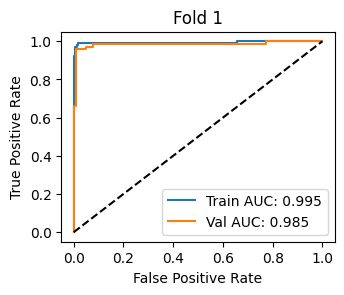

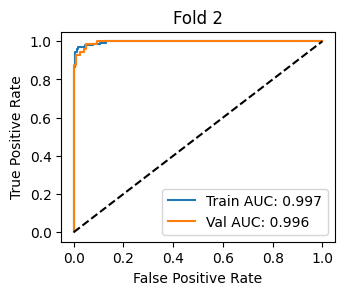

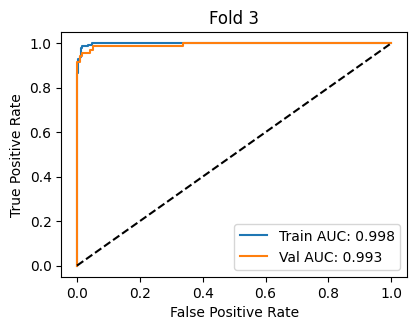

Average Training AUC: 0.997
Average Validation AUC: 0.991
Average EER: 0.045
Average d': 5.353


In [5]:
# Prepare to store results
train_aucs, val_aucs = [], []
train_rocs, val_rocs = [], []
eers, dprime_values = [], []

# Perform 3-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(P, T), 1):
    P_train, P_val = P[train_index], P[val_index]
    T_train, T_val = T[train_index], T[val_index]
    
    # Fit LDA
    lda.fit(P_train, T_train)
    
    # Predict probabilities
    train_probs = lda.predict_proba(P_train)[:, 1]
    val_probs = lda.predict_proba(P_val)[:, 1]
    
    # Calculate ROC and AUC
    train_fpr, train_tpr, _ = roc_curve(T_train, train_probs)
    val_fpr, val_tpr, _ = roc_curve(T_val, val_probs)
    
    train_auc = auc(train_fpr, train_tpr)
    val_auc = auc(val_fpr, val_tpr)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    train_rocs.append((train_fpr, train_tpr))
    val_rocs.append((val_fpr, val_tpr))
    
    # Calculate EER
    fnr = 1 - val_tpr
    eer = val_fpr[np.nanargmin(np.absolute(fnr - val_fpr))]
    eers.append(eer)
    
    
    # Calculate d-prime
    mu1, mu0 = np.mean(train_probs[T_train == 1]), np.mean(train_probs[T_train == -1])
    sigma1, sigma2 = np.var(train_probs[T_train == 1]), np.var(train_probs[T_train == -1])
    d_prime = abs(mu1 - mu0) / np.sqrt((sigma1 + sigma2) / 2)
    dprime_values.append(d_prime)
    
    
    # Plot ROC curves
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, fold)
    plt.plot(train_fpr, train_tpr, label=f'Train AUC: {train_auc:.3f}')
    plt.plot(val_fpr, val_tpr, label=f'Val AUC: {val_auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Fold {fold}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate average metrics
avg_train_auc = np.mean(train_aucs)
avg_val_auc = np.mean(val_aucs)
avg_eer = np.mean(eers)
avg_dprime = np.mean(dprime_values)

print(f"Average Training AUC: {avg_train_auc:.3f}")
print(f"Average Validation AUC: {avg_val_auc:.3f}")
print(f"Average EER: {avg_eer:.3f}")
print(f"Average d': {avg_dprime:.3f}")

* The __Linear Discriminant Analysis (LDA)__ with __3-fold cross-validation__ was successfully executed, producing __ROC curves__ for each fold and calculating the __average training__ and __validation AUCs__, __EER__, and __d-prime__. 

* The results indicate high performance with __an average training AUC of approximately 0.997__, __validation AUC of approximately 0.991__, __EER of 0.045__, and __d-prime of 5.353__, as shown in the ROC curves above.

## Task - 2 : QDAs
### Step 3: Quadratic Discriminant Analysis with 4-Fold Cross-Validation

1. __Implement QDA__
we use `QuadraticDiscriminantAnalysis` from `sklearn.discriminant_analysis` to perform __QDA.__

2. __Perform 4-Fold Cross-Validation__
We use `StratifiedKFold` from `sklearn.model_selection` to ensure that each fold has the same proportion of classes.


In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
# Initialize QDA
qda = QuadraticDiscriminantAnalysis()

# Initialize cross-validation
skf = StratifiedKFold(n_splits=4)

#### Perform 4-fold cross-validation

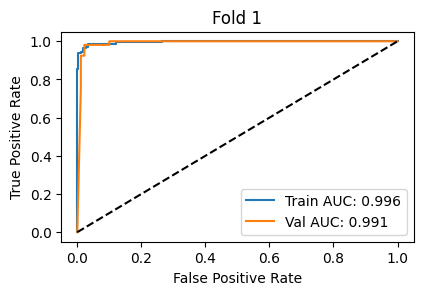

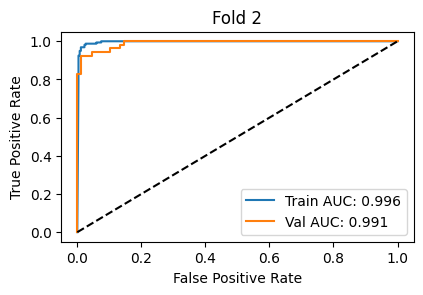

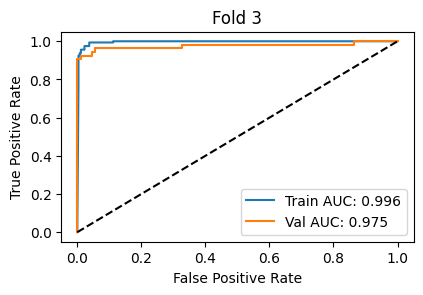

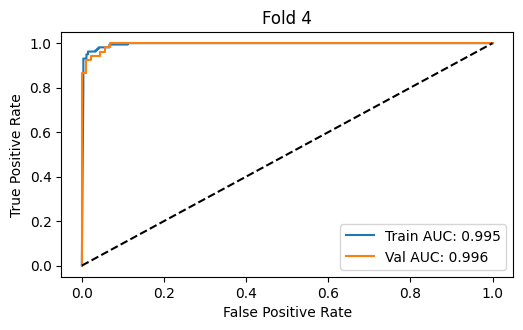

Average Training AUC: 0.996
Average Validation AUC: 0.988
Average EER: 0.042
Average d': 5.835


In [8]:
# Prepare to store results
train_aucs, val_aucs = [], []
train_rocs, val_rocs = [], []
eers, dprime_values = [], []


# Perform 4-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(P, T), 1):
    P_train, P_val = P[train_index], P[val_index]
    T_train, T_val = T[train_index], T[val_index]
    
    # Fit QDA
    qda.fit(P_train, T_train)
    
    # Predict probabilities
    train_probs = qda.predict_proba(P_train)[:, 1]
    val_probs = qda.predict_proba(P_val)[:, 1]
    
    # Calculate ROC and AUC
    train_fpr, train_tpr, _ = roc_curve(T_train, train_probs)
    val_fpr, val_tpr, _ = roc_curve(T_val, val_probs)
    
    train_auc = auc(train_fpr, train_tpr)
    val_auc = auc(val_fpr, val_tpr)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    train_rocs.append((train_fpr, train_tpr))
    val_rocs.append((val_fpr, val_tpr))
    
    # Calculate EER
    fnr = 1 - val_tpr
    eer = val_fpr[np.nanargmin(np.absolute(fnr - val_fpr))]
    eers.append(eer)
    
    # Calculate d-prime
    # Calculate d-prime
    mu1, mu0 = np.mean(train_probs[T_train == 1]), np.mean(train_probs[T_train == -1])
    sigma1, sigma2 = np.var(train_probs[T_train == 1]), np.var(train_probs[T_train == -1])
    d_prime = abs(mu1 - mu0) / np.sqrt((sigma1 + sigma2) / 2)
    dprime_values.append(d_prime)
    
    
    # Plot ROC curves
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, fold)
    plt.plot(train_fpr, train_tpr, label=f'Train AUC: {train_auc:.3f}')
    plt.plot(val_fpr, val_tpr, label=f'Val AUC: {val_auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Fold {fold}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate average metrics
avg_train_auc = np.mean(train_aucs)
avg_val_auc = np.mean(val_aucs)
avg_eer = np.mean(eers)
avg_dprime = np.mean(dprime_values)

print(f"Average Training AUC: {avg_train_auc:.3f}")
print(f"Average Validation AUC: {avg_val_auc:.3f}")
print(f"Average EER: {avg_eer:.3f}")
print(f"Average d': {avg_dprime:.3f}")

* The __Quadratic Discriminant Analysis (QDA)__ with __4-fold cross-validation__ was successfully executed, producing __ROC curves__ for each fold and calculating the __average training__ and __validation AUCs__, __EER__, and __d-prime__. 

* The results indicate high performance with __an average training AUC of approximately 0.996__, __validation AUC of 0.988__, __EER of 0.042__, and __d-prime of 5.835__, as shown in the ROC curves above.